### Perfroming classification on car dataset using decision tree

Dataset complete info:'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
## Attribute information
1. Class Values:  unacc, acc, good, vgood

### Attributes:

2. buying: vhigh, high, med, low.
3. maint: vhigh, high, med, low.
4. doors: 2, 3, 4, 5more.
5. persons: 2, 4, more.
6. lug_boot: small, med, big.
7. safety: low, med, high.

### Loding and visualizing the dataset

In [1]:
car_data ='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'


In [4]:
import pandas as pd
pd.read_csv(car_data,header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
column =['buying','maint','doors','persons','lug_boot','safety','Class Values']

In [6]:
df = pd.read_csv(car_data,names=column)
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1728 non-null   object
 1   maint         1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   Class Values  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


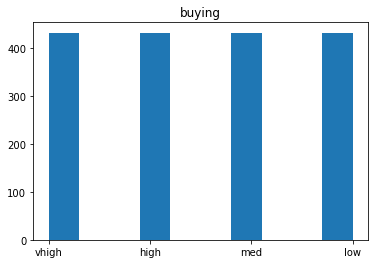

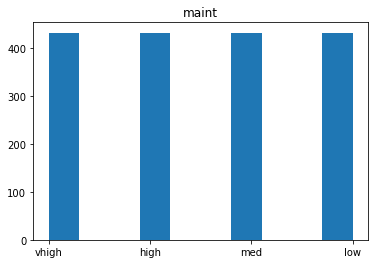

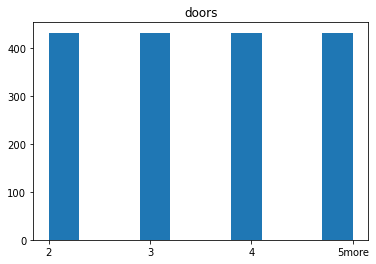

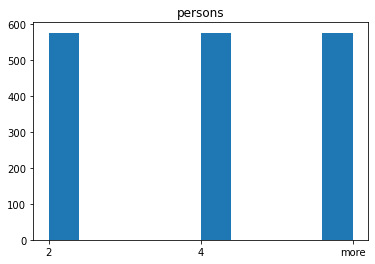

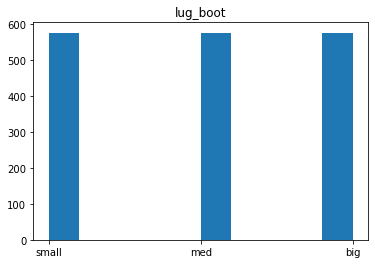

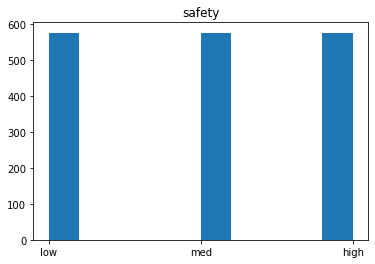

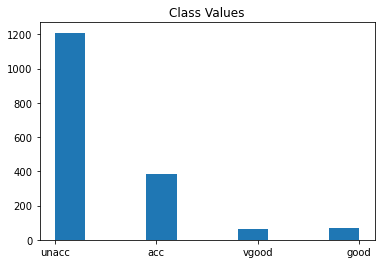

In [70]:
import matplotlib.pyplot as plt
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

### Encoding the dataset

In [8]:
import category_encoders
from category_encoders import OrdinalEncoder 


In [9]:
oe = OrdinalEncoder()

In [10]:
oe.fit(df)

OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot',
                     'safety', 'Class Values'],
               mapping=[{'col': 'buying', 'data_type': dtype('O'),
                         'mapping': vhigh    1
high     2
med      3
low      4
NaN     -2
dtype: int64},
                        {'col': 'maint', 'data_type': dtype('O'),
                         'mapping': vhigh    1
high     2
med      3
low      4
NaN     -2
dtype: int64},
                        {'col': 'doors', 'data_type': dtype('O'),
                         'mapping': 2        1
3        2
4        3
5more    4
NaN     -2
dtype: int64},
                        {'col': 'persons', 'data_type': dtype('O'),
                         'mapping': 2       1
4       2
more    3
NaN    -2
dtype: int64},
                        {'col': 'lug_boot', 'data_type': dtype('O'),
                         'mapping': small    1
med      2
big      3
NaN     -2
dtype: int64},
                        {'col': 'safety'

In [11]:
new_df= oe.transform(df)

In [71]:
new_df

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,4
1724,4,4,4,3,2,3,3
1725,4,4,4,3,3,1,1
1726,4,4,4,3,3,2,4


### Splitting the dataset and training the model

In [15]:
X, y = new_df.iloc[:, :-1], new_df.iloc[:, -1]

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [19]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
from sklearn import tree 

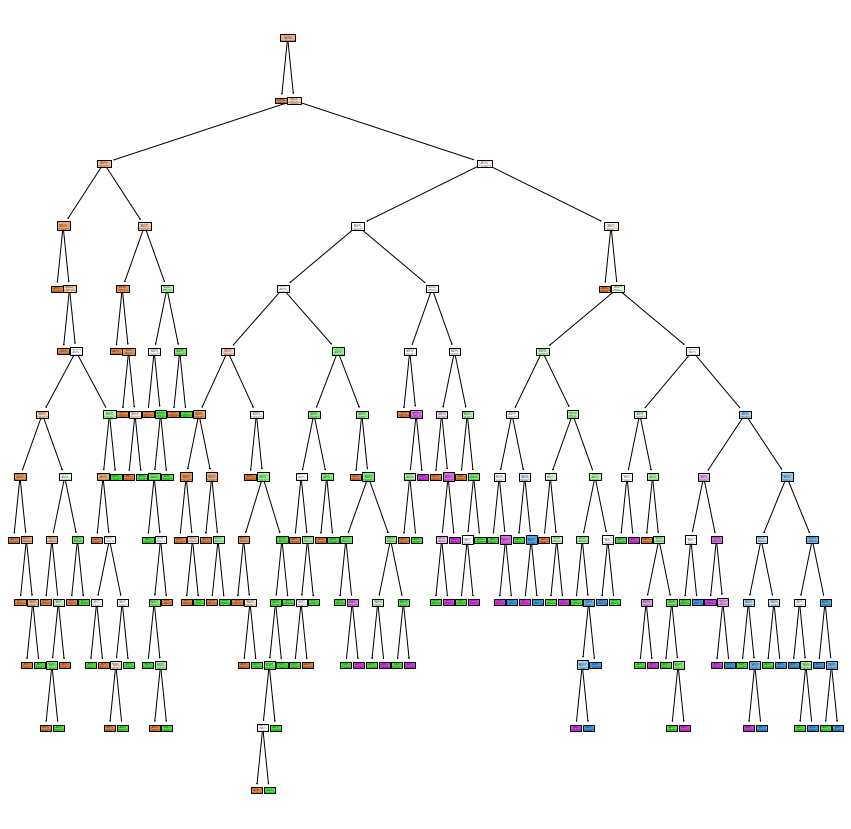

In [30]:
# visualizing the first decision tree in the forest
index = 0
plt.figure(figsize=(15, 15))
tree.plot_tree(clf.estimators_[index],
                   feature_names = new_df.columns, 
                   class_names=["unacc", "acc", "good", "vgood"],
                   filled = True,);



In [33]:
prediction =clf.predict(X_test)
prediction

array([1, 4, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 2, 3,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 2,
       3, 2, 1, 4, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 4, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 3, 1, 2, 2, 1, 4, 1, 1, 1, 1, 1,
       4, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 4, 3, 2, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1,

### Checking accurary of the model

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


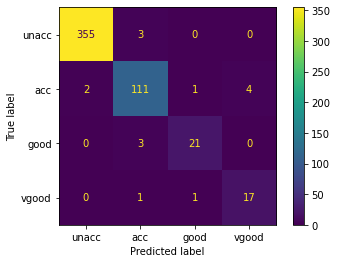

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels=["unacc", "acc", "good", "vgood"])

In [34]:
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       358
           2       0.94      0.94      0.94       118
           3       0.91      0.88      0.89        24
           4       0.81      0.89      0.85        19

    accuracy                           0.97       519
   macro avg       0.91      0.93      0.92       519
weighted avg       0.97      0.97      0.97       519



### Trying to check the best estimators using GridSearchCV

In [36]:
parameters = {'n_estimators':[50,80,110], 'criterion': ( 'gini' , 'entropy') , 'max_depth' :[5,8,12],'max_features':('auto', 'sqrt', 'log2')  }

In [37]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf, parameters)

In [40]:
grid_search.fit(X_train,y_train)

In [39]:
tuned_model = grid_search.best_estimator_
print(grid_search.best_score_)
tuned_model

0.9735125681560989


RandomForestClassifier(criterion='entropy', max_depth=12, max_features='log2',
                       n_estimators=110)

In [44]:
# pd.DataFrame(grid_search.cv_results_)

#### Applying LDA before Random forest to see if has any effect on performance

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
lda = LinearDiscriminantAnalysis()


In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
X_train_scaled_lda= lda.fit_transform(X_train_scaled,y_train)
X_test_scaled_lda= lda.transform(X_test_scaled)


In [60]:
clf2 = RandomForestClassifier()
clf2.fit(X_train_scaled_lda, y_train)

RandomForestClassifier()

In [61]:
prediction = clf2.predict(X_test_scaled_lda)
prediction

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 4, 1, 1, 1, 3, 2, 1, 1,
       3, 2, 1, 4, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 1, 2, 1, 2, 1, 1, 1,
       1, 4, 3, 2, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1,

In [62]:
clf2.score(X_test_scaled_lda,y_test)

0.8439306358381503

#### Applying PCA before Random forest to see if has any effect on performance

In [64]:
from sklearn.decomposition import PCA
pca = PCA()

In [67]:
X_train_scaled_pca= pca.fit_transform(X_train_scaled,y_train)
X_test_scaled_pca= pca.transform(X_test_scaled)

In [68]:
clf3 = RandomForestClassifier()
clf3.fit(X_train_scaled_pca, y_train)

RandomForestClassifier()

In [69]:
clf3.score(X_test_scaled_lda,y_test)

0.8516377649325626